In [58]:
import pandas as pd
import sklearn.datasets as ds
import matplotlib.pyplot as plt
%matplotlib inline
iris = ds.load_iris()

In [39]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [40]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [41]:
df = pd.DataFrame(iris.data, columns = iris.feature_names)
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [42]:
df['target'] = iris.target
df['flower_name'] = df.target.apply(lambda x: iris.target_names[x])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [43]:
cat_0 = df[df.target==0]
cat_1 = df[df.target==1]
cat_2 = df[df.target==2]
cat_0.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


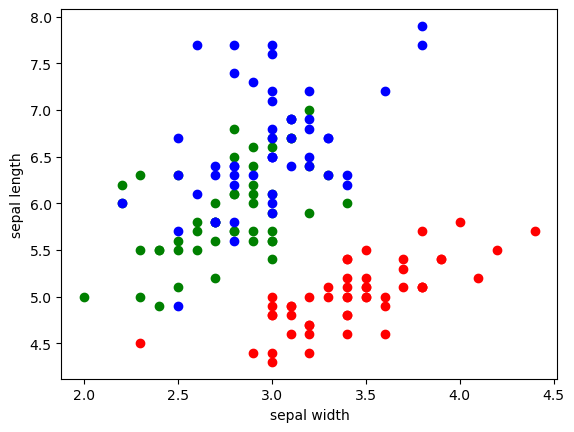

In [44]:
plt.xlabel('sepal width')
plt.ylabel('sepal length')
plt.scatter(cat_0['sepal width (cm)'], cat_0['sepal length (cm)'], color='red')
plt.scatter(cat_1['sepal width (cm)'], cat_1['sepal length (cm)'], color='green')
plt.scatter(cat_2['sepal width (cm)'], cat_2['sepal length (cm)'], color='blue')

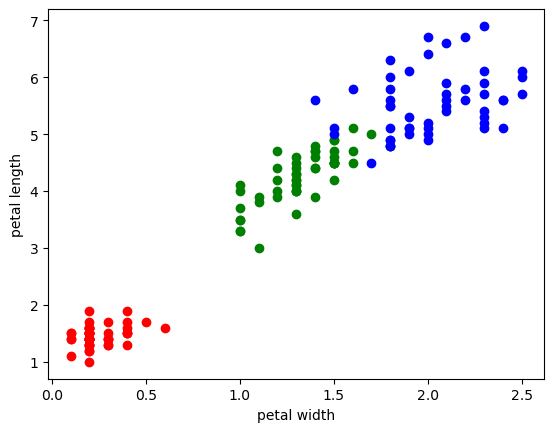

In [45]:
plt.xlabel('petal width')
plt.ylabel('petal length')
plt.scatter(cat_0['petal width (cm)'], cat_0['petal length (cm)'], color='red')
plt.scatter(cat_1['petal width (cm)'], cat_1['petal length (cm)'], color='green')
plt.scatter(cat_2['petal width (cm)'], cat_2['petal length (cm)'], color='blue')

Using pedal length and width produces a better representation of categorisation

In [46]:
from sklearn.model_selection import train_test_split
X = df.drop(['target', 'flower_name'], axis='columns')
y = df.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

Create KNN (K Neighrest Neighbour Classifier)

In [47]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [48]:
knn.score(X_test, y_test)

0.9777777777777777

In [49]:
knn.predict(X_test)

array([1, 1, 2, 0, 1, 2, 1, 0, 1, 2, 2, 2, 2, 1, 1, 1, 0, 2, 0, 2, 0, 0,
       1, 1, 2, 0, 1, 0, 0, 2, 2, 0, 0, 2, 2, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       2])

In [51]:
y_test

62     1
85     1
113    2
22     0
91     1
125    2
59     1
32     0
126    2
134    2
118    2
148    2
124    2
69     1
96     1
76     1
39     0
104    2
34     0
127    2
19     0
44     0
65     1
71     1
143    2
31     0
66     1
20     0
42     0
131    2
139    2
29     0
47     0
115    2
122    2
14     0
9      0
52     1
81     1
16     0
13     0
95     1
0      0
3      0
116    2
Name: target, dtype: int64

Plot Confusion Matrix

In [52]:
y_predicted = knn.predict(X_test)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predicted)
cm

array([[17,  0,  0],
       [ 0, 13,  0],
       [ 0,  1, 14]])

Text(95.72222222222221, 0.5, 'Truth')

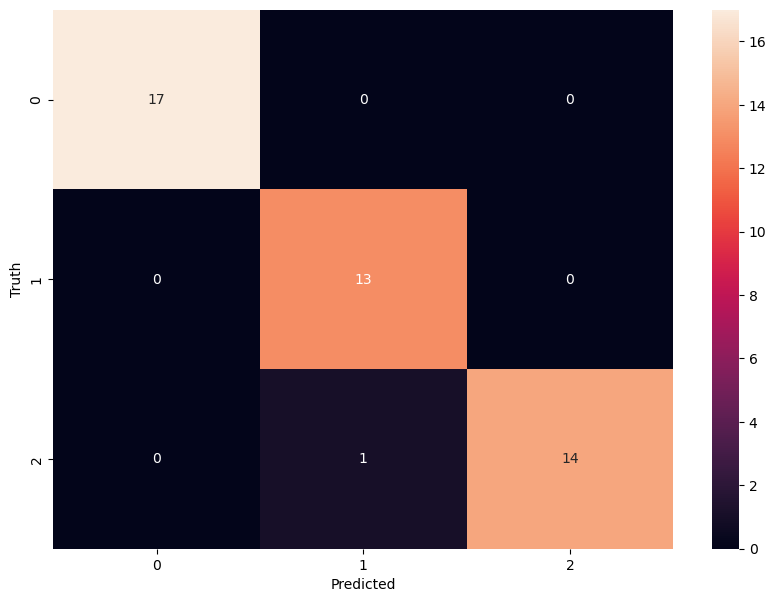

In [54]:
import seaborn as sn
plt.figure(figsize = (10, 7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [56]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       0.93      1.00      0.96        13
           2       1.00      0.93      0.97        15

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



Exercise

In [59]:
digits = ds.load_digits()

In [60]:
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [61]:
df = pd.DataFrame(digits.data, columns=digits.feature_names)
df.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [63]:
df['target'] = digits.target
df.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


In [65]:
X = df.drop(['target'], axis='columns')
X

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,4.0,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0


In [66]:
y = digits.target
y

array([0, 1, 2, ..., 8, 9, 8])

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [68]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [69]:
knn.score(X_test, y_test)

0.9777777777777777

In [72]:
from sklearn.model_selection import GridSearchCV
clf = GridSearchCV(KNeighborsClassifier(n_neighbors=10), {
    'n_neighbors': [5,10,20],
}, cv=5, return_train_score=False)
clf.fit(digits.data, digits.target)
clf.cv_results_

{'mean_fit_time': array([0.00091481, 0.00061808, 0.00042381]),
 'std_fit_time': array([3.16654413e-04, 1.73923933e-04, 6.78970906e-05]),
 'mean_score_time': array([0.0055584 , 0.00380564, 0.00463095]),
 'std_score_time': array([0.0015299 , 0.00035868, 0.00087551]),
 'param_n_neighbors': masked_array(data=[5, 10, 20],
              mask=[False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'n_neighbors': 5}, {'n_neighbors': 10}, {'n_neighbors': 20}],
 'split0_test_score': array([0.94722222, 0.93055556, 0.925     ]),
 'split1_test_score': array([0.95555556, 0.94722222, 0.95      ]),
 'split2_test_score': array([0.96657382, 0.96935933, 0.96657382]),
 'split3_test_score': array([0.98050139, 0.97771588, 0.96100279]),
 'split4_test_score': array([0.9637883 , 0.94986072, 0.94428969]),
 'mean_test_score': array([0.96272826, 0.95494274, 0.94937326]),
 'std_test_score': array([0.01116854, 0.01677273, 0.01450101]),
 'rank_test_score': array([1, 2, 3], dtype=int32

In [73]:
df_results = pd.DataFrame(clf.cv_results_)
df_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.000915,0.000317,0.005558,0.001530,5,{'n_neighbors': 5},0.947222,0.955556,0.966574,0.980501,0.963788,0.962728,0.011169,1
1,0.000618,0.000174,0.003806,0.000359,10,{'n_neighbors': 10},0.930556,0.947222,0.969359,0.977716,0.949861,0.954943,0.016773,2
2,0.000424,0.000068,0.004631,0.000876,20,{'n_neighbors': 20},0.925000,0.950000,0.966574,0.961003,0.944290,0.949373,0.014501,3


In [74]:
clf.best_params_

{'n_neighbors': 5}

In [75]:
clf.best_score_

0.9627282575054161

In [77]:
y_predicted = knn.predict(X_test)
cm = confusion_matrix(y_test, y_predicted)
cm

array([[49,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 50,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  1, 59,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 53,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 54,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  0,  0, 54,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 45,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 55,  0,  0],
       [ 0,  5,  0,  0,  0,  0,  0,  0, 48,  0],
       [ 0,  1,  0,  2,  0,  1,  0,  0,  1, 61]])

Text(33.22222222222222, 0.5, 'Truth')

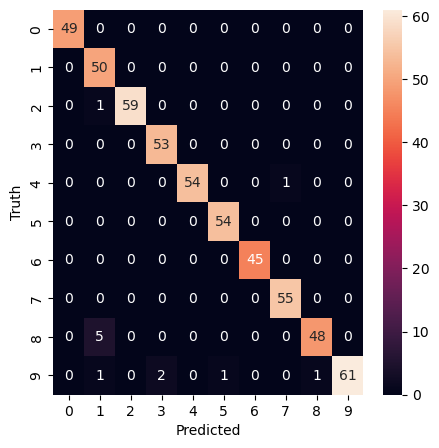

In [80]:
plt.figure(figsize = (5, 5))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [81]:
print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        49
           1       0.88      1.00      0.93        50
           2       1.00      0.98      0.99        60
           3       0.96      1.00      0.98        53
           4       1.00      0.98      0.99        55
           5       0.98      1.00      0.99        54
           6       1.00      1.00      1.00        45
           7       0.98      1.00      0.99        55
           8       0.98      0.91      0.94        53
           9       1.00      0.92      0.96        66

    accuracy                           0.98       540
   macro avg       0.98      0.98      0.98       540
weighted avg       0.98      0.98      0.98       540

